In [121]:
should_stem = False
should_remove_stopwords = False

In [122]:
import sys
# sys.path.insert(1, '/persistent/Sefaria-Project/ML/scripts/classes.py')
sys.path.insert(1, '/persistent/Sefaria-Project/ML/scripts/')

In [123]:
import numpy as np
import pandas as pd

In [124]:
from tqdm import tqdm
from datetime import datetime
from sklearn.metrics import accuracy_score
# from classes import DataManager, PipelineFactory, my_example_topics
my_example_topics = [
#     'prayer', 
    'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']

my_example_topics

['procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [136]:
start_time = datetime.now()
import csv
NUM_TOPICS = 40
NUM_DATA_POINTS = 1000
pd.options.display.max_colwidth = 100

In [137]:
df = pd.read_csv('/persistent/Sefaria-Project/ML/data/yishai_data.csv',
                 quoting=2, error_bad_lines=False
                )[:NUM_DATA_POINTS]
print('Original:',df.shape)
df = df.drop_duplicates()
print('Without duplicates:',df.shape)
df = df.dropna()
print('Without nulls:',df.shape)
df.head()

Original: (1000, 5)
Without duplicates: (1000, 5)
Without nulls: (667, 5)


,Ref,En,He,Topics,Expanded Topics
0,Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",התם לא אשתמשו בהו לגבוה הכא כיון דאשתמש בהו לגבוה לאו אורח ארעא לאשתמושי בהו הדיוטא:,derekh-eretz laws-of-building-the-temple-and-its-furnishings,continuant laws laws-of-building-the-temple-and-its-furnishings halachic-process acts laws-of-th...
1,Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,(<big><strong>ברייתא</strong></big>) המשמש מטתו לאור הנר הוויין לו בנים נכפים: <big><strong>[גמ׳...,sexual-intercourse,acts occurent entity sexual-intercourse
2,Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,<big><strong>מתני׳</strong></big> הכהנים ממירין בשלהן וישראל ממירין בשלהן אין הכהנים ממירין לא ב...,substitutions-of-sacrifices laws-of-substitution-of-offerings,continuant substitutions-of-sacrifices laws halachic-process acts laws-of-substitution-of-offeri...
4,Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,"א""ר יוחנן מ""ט דבי רבי דכתיב (תהלים קד, יט) עשה ירח למועדים שמש ידע מבואו שמש הוא דידע מבואו ירח ...",months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time,material-entity group-of-inanimate-objects entity independent-continuant months luminaries one-d...
7,Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,<big><strong>גמ׳</strong></big> אתמר מנה לי בידך והלה אומר איני יודע רב יהודה ורב הונא אמרי חייב...,laws-of-litigant-oaths safek,continuant laws laws-of-litigant-oaths quality safek property-law specifically-dependent-continu...


In [138]:
df['En'].sample(10)

584    <b>Rav said: What is the rationale</b> for the opinion <b>of Rabbi Yehuda ben Bava? As it is wri...
521    9. When a slave asks his master to move to Eretz Yisrael, we compel his master to move there wit...
592    In order to explain the dispute, <b>Abaye said: Everyone agrees that if</b> the entire arch <b>i...
143    And they shall come from the cities of Judah, and from the places round about Jerusalem, and fro...
697    ’Number the children of Levi by their fathers’houses, by their families; every male from a month...
488    23 (Numb. 11:16) “Gather Me seventy man (<i>sic</i>)<sup>49</sup><i class="footnote">The midrash...
259    "Between Me and the children of Israel it is a sign forever": and not between Me and the peoples...
275    <b>And</b> furthermore, the disqualification following from a change in sanctity <b>applies afte...
617    and also let the gold and silver vessels of the house of God, which Nebuchadnezzar took forth ou...
209    The Gemara notes: <b>And</b> i

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ref              667 non-null    object
 1   En               667 non-null    object
 2   He               667 non-null    object
 3   Topics           667 non-null    object
 4   Expanded Topics  667 non-null    object
dtypes: object(5)
memory usage: 31.3+ KB


In [140]:
df = df[['Ref','En','Topics']]
df.head()

,Ref,En,Topics
0,Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",derekh-eretz laws-of-building-the-temple-and-its-furnishings
1,Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,sexual-intercourse
2,Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,substitutions-of-sacrifices laws-of-substitution-of-offerings
4,Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time
7,Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,laws-of-litigant-oaths safek


In [141]:
df = df.rename(columns={'Ref': 'Ref', 'En': 'passage_text'})

In [142]:
df = pd.concat([df, df.pop('Topics').str.get_dummies(sep=' ')], axis=1)
df.head()

,Ref,passage_text,400,a-day-or-two,aaron,abaye,abimelech-the-son-of-jerubaal,abodes,abraham,abraham-and-sodom,...,writing,yavneh,years,yehonatan,yetzer-hara,yidoni,yirat-shamayim,you-shall-not-cut-yourself,zedekiah,zevulun
0,Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
data_raw = df
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Ref                           0
passage_text                  0
400                           0
a-day-or-two                  0
aaron                         0
                             ..
yidoni                        0
yirat-shamayim                0
you-shall-not-cut-yourself    0
zedekiah                      0
zevulun                       0
Length: 780, dtype: int64


In [144]:
# passages with no label are considered to be clean passages.
# Creating seperate column in dataframe to identify clean passages.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_passages_count = (rowSums==0).sum(axis=0)

print("Total number of passages = ",len(data_raw))
print("Number of clean passages = ",clean_passages_count)
print("Number of passages with labels =",(len(data_raw)-clean_passages_count))

Total number of passages =  667
Number of clean passages =  0
Number of passages with labels = 667


In [145]:
columns_wanted = ['Ref','passage_text'] + my_example_topics
columns_wanted

['Ref',
 'passage_text',
 'procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [146]:
data_raw = data_raw[columns_wanted]
data_raw.shape

(667, 11)

In [147]:
df_all_rows = data_raw

In [165]:
# show True for nonzero
(df_all_rows[my_example_topics] != 0).loc[783:785]

,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
783,False,False,False,False,False,False,False,False,False
784,True,False,False,False,False,False,False,False,False
785,False,False,False,False,False,False,False,False,False


In [166]:
# show True if row contains a nonzero
~(df_all_rows[my_example_topics] == 0).all(axis=1).loc[783:785]

783    False
784     True
785    False
dtype: bool

In [167]:
# keep only rows which don't have all zeroes
df_wanted_rows = data_raw[~(df_all_rows[my_example_topics] == 0).all(axis=1)]
df_wanted_rows.head()

,Ref,passage_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
21,Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,1,0,0,0
48,Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,1,0,0,0,0,0,0,0,0
54,Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,1,0,0,0,0,0,0
65,Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,1,0,0,0,0,0,0
69,Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,1,0


In [168]:
df_wanted_rows.shape

(62, 11)

In [169]:
data_raw = df_wanted_rows

In [170]:
data_raw.shape

(62, 11)

In [171]:
data_raw.head()

,Ref,passage_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
21,Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,1,0,0,0
48,Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,1,0,0,0,0,0,0,0,0
54,Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,1,0,0,0,0,0,0
65,Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,1,0,0,0,0,0,0
69,Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,1,0


In [172]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']


In [173]:

# Calculating number of passages in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of passages'])
df_stats

,category,number of passages
0,procedures-for-judges-and-conduct-towards-them,13
1,learning,2
2,kings,8
3,hilchot-chol-hamoed,5
4,laws-of-judges-and-courts,14
5,laws-of-animal-sacrifices,7
6,financial-ramifications-of-marriage,3
7,idolatry,8
8,laws-of-transferring-between-domains,7


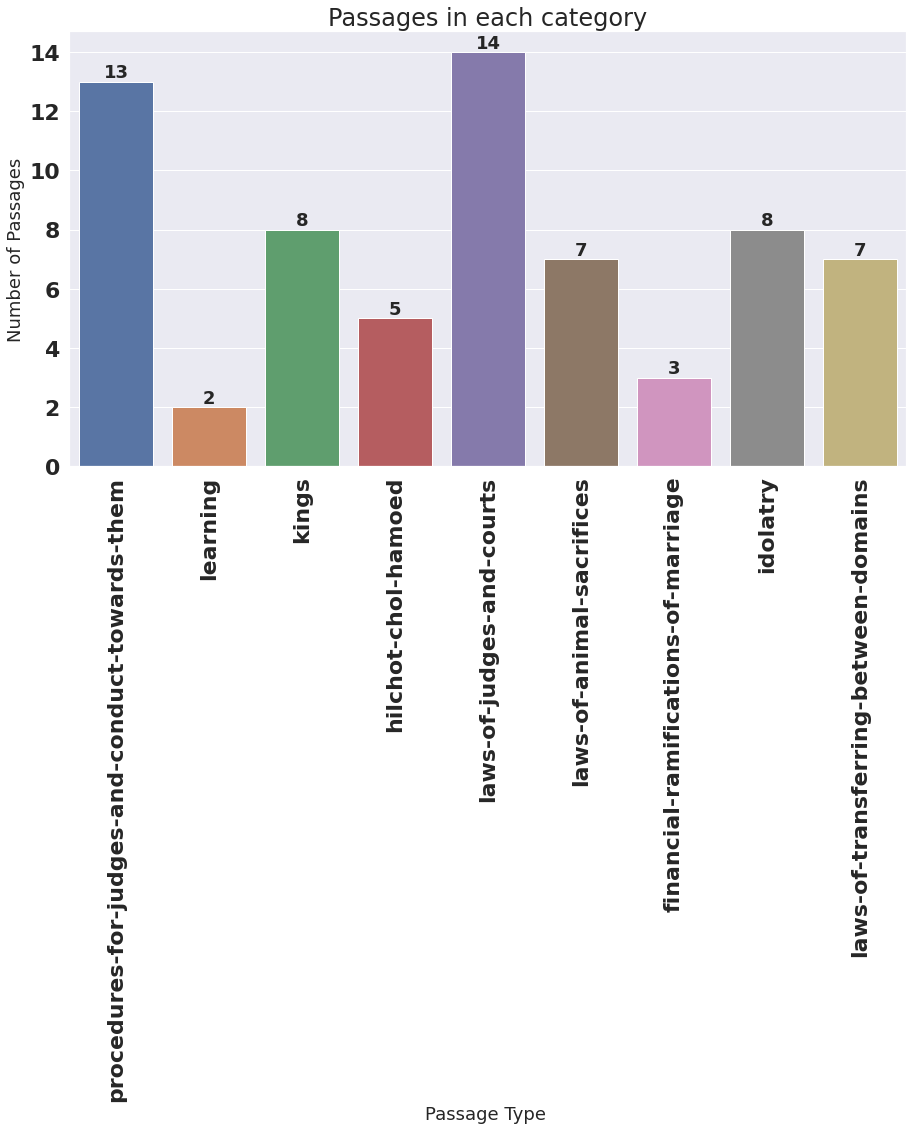

In [174]:
# !pip install sns/
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Passages in each category", fontsize=24)
plt.ylabel('Number of Passages', fontsize=18)
plt.xlabel('Passage Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)
plt.show()

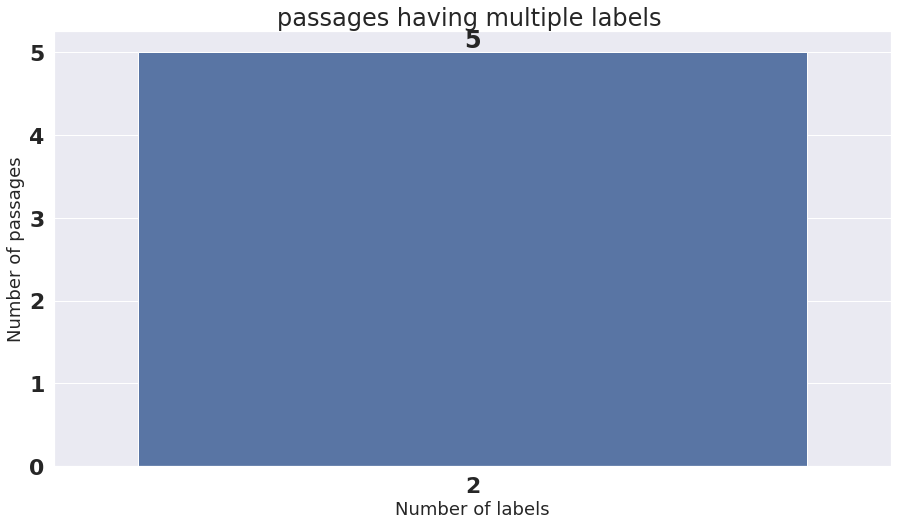

In [175]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("passages having multiple labels ")
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0, label, ha='center', va='bottom')

plt.show()

In [176]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape


(2000, 11)

In [177]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [178]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [179]:

data['passage_text'] = data['passage_text'].str.lower()
data['passage_text'] = data['passage_text'].apply(cleanHtml)
data['passage_text'] = data['passage_text'].apply(cleanPunc)
data['passage_text'] = data['passage_text'].apply(keepAlpha)
data.head()

,Ref,passage_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
124,Ketubot 55a:4,the residents of mata me asya say it is seized from liened property that has been sold their tr...,0,0,0,0,0,0,1,0,0
71,"Shulchan Arukh, Orach Chayim 545:6",we do not write a loan contract on the festival if either the lender does not trust the borrower...,0,0,0,1,0,0,0,0,0
642,Sanhedrin 33a:9,the mishna continues and the incident came before the sages of the court in yavne and they rule...,0,0,0,0,1,0,0,0,0
449,"Shulchan Arukh, Orach Chayim 547:9",everyone eats a mourners meal in public for a scholar who died similar to the way in which mourn...,0,0,0,1,0,0,0,0,0
227,Shabbat 10a:11,in the innermost room which is a place where people stand naked greeting others is not permitted...,1,0,0,0,0,0,0,0,0


In [180]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [181]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

if should_remove_stopwords:
    data['passage_text'] = data['passage_text'].apply(removeStopWords)
data.head()

,Ref,passage_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
124,Ketubot 55a:4,the residents of mata me asya say it is seized from liened property that has been sold their tr...,0,0,0,0,0,0,1,0,0
71,"Shulchan Arukh, Orach Chayim 545:6",we do not write a loan contract on the festival if either the lender does not trust the borrower...,0,0,0,1,0,0,0,0,0
642,Sanhedrin 33a:9,the mishna continues and the incident came before the sages of the court in yavne and they rule...,0,0,0,0,1,0,0,0,0
449,"Shulchan Arukh, Orach Chayim 547:9",everyone eats a mourners meal in public for a scholar who died similar to the way in which mourn...,0,0,0,1,0,0,0,0,0
227,Shabbat 10a:11,in the innermost room which is a place where people stand naked greeting others is not permitted...,1,0,0,0,0,0,0,0,0


In [182]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

if should_stem:
    data['passage_text'] = data['passage_text'].apply(stemming)
data.head()

,Ref,passage_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
124,Ketubot 55a:4,the residents of mata me asya say it is seized from liened property that has been sold their tr...,0,0,0,0,0,0,1,0,0
71,"Shulchan Arukh, Orach Chayim 545:6",we do not write a loan contract on the festival if either the lender does not trust the borrower...,0,0,0,1,0,0,0,0,0
642,Sanhedrin 33a:9,the mishna continues and the incident came before the sages of the court in yavne and they rule...,0,0,0,0,1,0,0,0,0
449,"Shulchan Arukh, Orach Chayim 547:9",everyone eats a mourners meal in public for a scholar who died similar to the way in which mourn...,0,0,0,1,0,0,0,0,0
227,Shabbat 10a:11,in the innermost room which is a place where people stand naked greeting others is not permitted...,1,0,0,0,0,0,0,0,0


In [183]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, 
#                                shuffle=True
                              )

print(train.shape)
print(test.shape)

(1400, 11)
(600, 11)


In [184]:

train_text = train['passage_text']
test_text = test['passage_text']

In [185]:
# print(type(test_text))
test_text.head()

968    the rabbi  it can be designated by prophetic or visionary means demonstration can lead astray de...
476    the gemara answers  there in the baraita the reference is to a gentile who engages in the study ...
85     the gemara rejects this  and can you understand that the sages relied on cattle herders to deter...
523    the gemara relates  a certain magus said to ameimar  from your midpoint and up is in the domain ...
371    rava said to him  but the dispute between beit shammai and beit hillel is considered like a case...
Name: passage_text, dtype: object

In [186]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
# vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [187]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Ref','passage_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Ref','passage_text'], axis=1)

In [188]:
print(type(x_test))
x_test

<class 'scipy.sparse.csr.csr_matrix'>


<600x17042 sparse matrix of type '<class 'numpy.float64'>'
	with 199940 stored elements in Compressed Sparse Row format>

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [190]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**bold**')

**bold**

In [191]:
labels = {}
# labels[passage_id] = {
#     'text':'in the beginning God createed...',
#     'data_subset':'training',
#     'true_labels':['creation', 'universe'], 
#     'pred_labels':['prayer','korbanos']
# }

# misclassifications['exile']['redemption'] = [
#     list of passages that are truly 
#     labeled as exile, but were 
#     misclassfied as redemption
#     ]

In [192]:
train_size = train.shape[0]
train_size

1400

In [193]:
test_size = test.shape[0]
test_size

600

In [226]:
labels = {}
for train_index in list(train.index)[:5]:
#     print(train_index)
#     print(type(train_index))
    labels[train_index] = {
#         'text':data_raw['passage_text'].loc[[train_index]].to_string(),
        'Ref':data['Ref'].iloc[[train_index]].to_string(),
        'text':data['passage_text'].iloc[[train_index]].to_string(),
        'data_subset':'training',     
        'true_labels':[],
        'pred_labels':[],
    }

for passage_index,passage_info in labels.items():
    print()
    for k,v in passage_info.items():
        print(k,":",v)


Ref : 458    Sefer HaChinukh 447:3
text : 458    and this prohibition is practiced in every place and at all times by males and females  as even ...
data_subset : training
true_labels : []
pred_labels : []

Ref : 307    Eruvin 98b:7
text : 307    gemara  the gemara clarifies  this ledge to where does it protrude if you say that the ledge pro...
data_subset : training
true_labels : []
pred_labels : []

Ref : 212    Sefer HaChinukh 86:2
text : 212    it is from the roots of the commandment to distance any matter of idolatry   whether in deed or ...
data_subset : training
true_labels : []
pred_labels : []

Ref : 458    Sefer HaChinukh 447:3
text : 458    and this prohibition is practiced in every place and at all times by males and females  as even ...
data_subset : training
true_labels : []
pred_labels : []

Ref : 659    Eruvin 7a:14
text : 659    the gemara raises a question about this ruling  now if you say that where there is a main street...
data_subset : training
true_labels : []
p

In [99]:
for test_index in list(test.index)[:5]:
    print(test_index)

882
48
884
21
85


In [94]:
for passage_index in range(test_size)[-5:]:
    print(passage_index)
    #     labels[passage_index] = passage_index

595
596
597
598
599


In [47]:

%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])



for category in categories:
    
    misclassifications[category] = {}
    
    printmd('**Processing {} passages...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # get prediction
    prediction = LogReg_pipeline.predict(x_test)
    
    # store classification result
    
    
    # calculating test accuracy    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    
    topic_indices = [i for i, e in enumerate(prediction) if e != 0]

    for i in topic_indices[:3]:
        print()
        print(i)
    #     print(data_raw.loc[[i]])
        print(test_text.iloc[i])
    
    print("\n")

**Processing procedures-for-judges-and-conduct-towards-them comments...**

Test accuracy is 1.0

1
rav yehuda says that rav na man says  a person is deemed credible to say  i had a prosbol and i lost it and collect payment of his debt the gemara explains  what is the reason for this since the sages instituted the prosbol in a manner that allows anyone to write one without difficulty in a situation such as this one does not leave aside a permitted item i e collecting a debt after having written a prosbol and eat a forbidden item i e collecting a debt without having written a prosbol

6
the gemara explains  rava did not state his explanation of the baraita in accordance with the explanation of rabba bar rav huna because the phrase  it is appropriated from his possession indicates that the field was taken from him legally and not by thugs and rabba bar rav huna did not state his explanation of the baraita in accordance with the explanation of rava because the phrase  it is appropriated from his possession indicates that the field is appropriated in its unadulter

**Processing learning comments...**

Test accuracy is 1.0

20
what is his remedy he must increase the time he sits and studies as it is stated   then must he increase his strength  ecclesiastes   the last part of the verse   but wisdom is profitable to direct   means that all the more so if his study of the mishna is organized for him from the beginning he will avoid this trouble

35
the gemara answers  there in the baraita the reference is to a gentile who engages in the study of their seven mitzvot it is a mitzva for a gentile to study the halakhot that pertain to the seven noahide mitzvot and when he does so he is highly regarded

50
what is his remedy he must increase the time he sits and studies as it is stated   then must he increase his strength  ecclesiastes   the last part of the verse   but wisdom is profitable to direct   means that all the more so if his study of the mishna is organized for him from the beginning he will avoid this trouble




**Processing kings comments...**

Test accuracy is 1.0

0
the baraita continues  and still i do not know whether building them the chosen house is first or cutting off the seed of amalek is first i e after the appointing of the king when the verse states   and he will give you rest from all your enemies round about so that you dwell in safety  then it shall come to pass that the place that the lord your god shall choose to cause his name to dwell there there shall you bring all that i command you  deuteronomy   you must say that the jewish people were to cut off the seed of amalek first

2
exodus   the l rd is my strength and my song  my strength is torah viz psalms   the l rd will give strength to his people and it is written ibid   and they will praise the strength of the king who loves the torah of justice variantly  my strength is kingship viz ibid   o l rd in your strength the king rejoices and i samuel   and he will give strength to his king variantly  my strength is my stronghold as it is written jeremiah   the 

**Processing hilchot-chol-hamoed comments...**

Test accuracy is 1.0

9
we do not write a loan contract on the festival if either the lender does not trust the borrower and the borrower needs the money or the scribe does not have what to eat there it can be written note rema   it is permitted to write a sales receipt on the festival tosafos but there is not to write a tenant or contractor contract that was accepted before the festival rabbeinu yeruchom

36
come and hear the resolution to the dilemma from another source from another source rabbi meir says  with regard to any labor that is for the purpose of the festival

44
we do not write a loan contract on the festival if either the lender does not trust the borrower and the borrower needs the money or the scribe does not have what to eat there it can be written note rema   it is permitted to write a sales receipt on the festival tosafos but there is not to write a tenant or contractor contract that was accepted before the festival rabbeinu yeruchom




**Processing laws-of-judges-and-courts comments...**

Test accuracy is 1.0

4
the gemara rejects this  and can you understand that the sages relied on cattle herders to determine halakha rather the sages relied on their own calculations and those cattle herders were supported inasmuch as their statements were supported by the sages  independent conclusion

7
rava said to him  but the dispute between beit shammai and beit hillel is considered like a case of two courts in one city as these two schools of thought were found everywhere not in any specific place rather rava said  when we say that the prohibition   you shall not cut yourselves  applies we are referring to a case where there is a court in one city a section of which rules in accordance with the statement of beit shammai and another section rules in accordance with the statement of beit hillel however with regard to two courts located in one city we have no problem with it

11
mishna  if a rumor circulated in the city that an unmarried woman is betrothed she is considered to be b

**Processing laws-of-animal-sacrifices comments...**

Test accuracy is 1.0

3
rav adda son of rav yitz ak raises an objection to rav adda bar ahava s explanation from a baraita   there is a halakha that applies to birds that does not apply to meal offerings and there is a halakha that applies to meal offerings that does not apply to birds the baraita elaborates  there is a halakha that applies to birds that does not apply to meal offerings as birds may be brought as a gift offering on behalf of two people i e two people may take a vow to bring a single bird offering jointly but with regard to meal offerings it is written   and when one brings a meal offering  leviticus   indicating that only individuals may vow to bring a meal offering

14
rav adda son of rav yitz ak raises an objection to rav adda bar ahava s explanation from a baraita   there is a halakha that applies to birds that does not apply to meal offerings and there is a halakha that applies to meal offerings that does not apply to birds the baraita elaborates  there is a halakh

**Processing financial-ramifications-of-marriage comments...**

Test accuracy is 1.0

5
a widow who came to the court to sue for her board payments  they sell  property from the estate  without prior announcement and give her board payments and similarly she may sell by the order of an expert court but also by the order of a  lower court of  three reliable  men  without prior announcement and similarly if she sold it herself for equal value her sale stands  but there are those who disagree with this

49
a widow who came to the court to sue for her board payments  they sell  property from the estate  without prior announcement and give her board payments and similarly she may sell by the order of an expert court but also by the order of a  lower court of  three reliable  men  without prior announcement and similarly if she sold it herself for equal value her sale stands  but there are those who disagree with this

67
a widow who came to the court to sue for her board payments  they sell  property from the estate  without prior announcement and give 

**Processing idolatry comments...**

Test accuracy is 1.0

30
and if ye have erred and not done  all these commandments which the lord hath spoken unto moses    idolatry which is the transgression referred to here  cf rashi on next passage is naturally comprehended under the general term  all the commandments  see leviticus   for which the whole community brings a bullock as a sin offering if it infringes one of them but you see scripture here excepts it the sin of idolatry from the general law about them to bring it under the law of a bullock as a burnt offering and a he goat for a sin offering whilst the rule in leviticus   is a bullock for sin offering and no he goat is prescribed sifrei bamidbar

75
the graven images of their gods shall ye burn with fire  thou shalt not covet the silver or the gold that is on them nor take it unto thee lest thou be snared therein  for it is an abomination to the lord thy god

76
one man should not say to another  wait for me alongside that idol or like expression but all forms of idol

**Processing laws-of-transferring-between-domains comments...**

Test accuracy is 1.0

8
the gemara raises a question about this ruling  now if you say that where there is a main street from here on one side of the alleyway and a valley from here on the other side it is sufficient to construct an opening in the form of a doorway from here on one side and a side post or a cross beam from here on the other side was it necessary to state that these are sufficient if there is a valley from here on one side of the alleyway and a valley from her e on the other side

12
the sages taught with regard to the construction of the tabernacle  the bottoms of the beams were grooved and the sockets were hollow and the grooves were inserted into the sockets to support the beams

17
the gemara raises a question about this ruling  now if you say that where there is a main street from here on one side of the alleyway and a valley from here on the other side it is sufficient to construct an opening in the form of a doorway from here on one side and a side post or a cros

In [48]:
category

'laws-of-transferring-between-domains'

In [49]:
prediction = LogReg_pipeline.predict(x_test)
# print(type(prediction[:5]))
prediction[:50]
# prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [50]:
type(prediction)

numpy.ndarray

In [51]:

domain_indices = [i for i, e in enumerate(prediction) if e != 0]


In [52]:
type(domain_indices)

list

In [53]:
type(test_text)

pandas.core.series.Series

In [54]:
test_text.iloc[3]

'rav adda son of rav yitz ak raises an objection to rav adda bar ahava s explanation from a baraita   there is a halakha that applies to birds that does not apply to meal offerings and there is a halakha that applies to meal offerings that does not apply to birds the baraita elaborates  there is a halakha that applies to birds that does not apply to meal offerings as birds may be brought as a gift offering on behalf of two people i e two people may take a vow to bring a single bird offering jointly but with regard to meal offerings it is written   and when one brings a meal offering  leviticus   indicating that only individuals may vow to bring a meal offering'

In [55]:
data_raw.head()

,id,comment_text,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
21,Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,1,0,0,0
48,Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,1,0,0,0,0,0,0,0,0
54,Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,1,0,0,0,0,0,0
65,Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,1,0,0,0,0,0,0
69,Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,1,0


In [66]:
domain_indices = [i for i, e in enumerate(prediction) if e != 0]

for i in domain_indices[:1]:
    print()
    print(i)
#     print(data_raw.loc[[i]])
    print(test_text.iloc[i])


8
the gemara raises a question about this ruling  now if you say that where there is a main street from here on one side of the alleyway and a valley from here on the other side it is sufficient to construct an opening in the form of a doorway from here on one side and a side post or a cross beam from here on the other side was it necessary to state that these are sufficient if there is a valley from here on one side of the alleyway and a valley from her e on the other side


In [67]:
y_test.head()

,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
882,0,0,1,0,0,0,0,0,0
48,1,0,0,0,0,0,0,0,0
884,0,0,1,0,0,0,0,0,0
21,0,0,0,0,0,1,0,0,0
85,0,0,0,0,1,0,0,0,0


In [68]:
y_test.shape

(600, 9)

In [69]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict"
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  1.0


CPU times: user 3.93 s, sys: 3.85 s, total: 7.78 s
Wall time: 7.8 s


In [70]:
type(predictions.toarray())

numpy.ndarray

In [71]:
predictions.shape

(600, 9)

In [72]:
y_test_df = y_test

In [73]:
y_test_array = y_test_df.values
type(y_test_array)

numpy.ndarray

In [74]:
y_test_array.shape

(600, 9)

Y_test.shape (600, 9)
Y_pred.shape (600, 9)
Accuracy on the test-set: 1.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

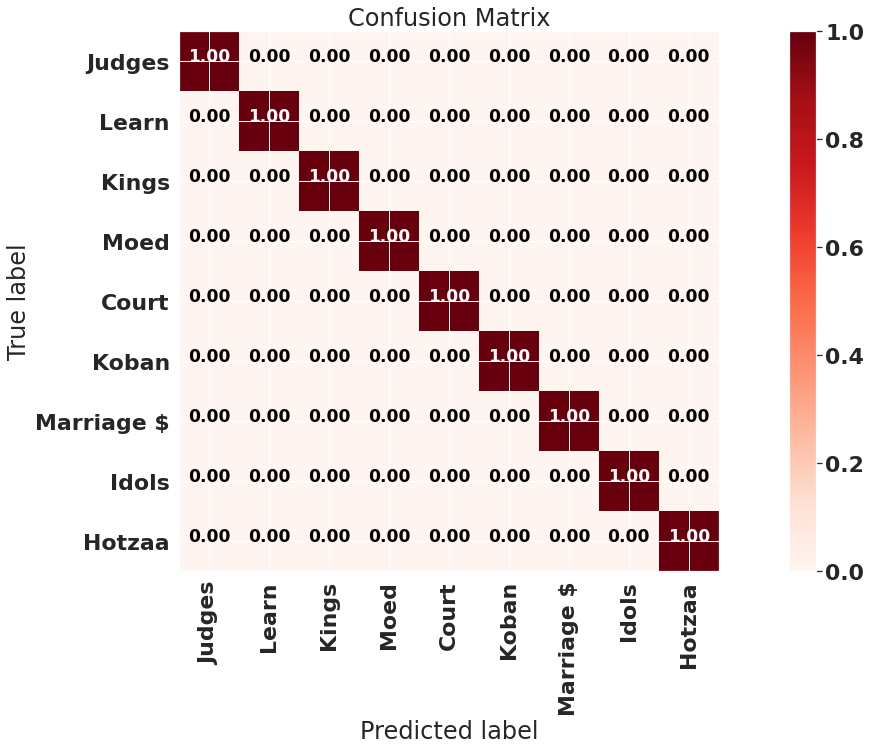

In [79]:
import mlcm

import numpy

# Y_test = [(0,0,0),(0,2,0),(1,0,0)]
Y_test = y_test_array

# Y_pred = [(0,0,1),(0,1,1),(1,0,0)]
Y_pred = predictions.toarray()

# classes = ['prayer', 'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']
classes = [
#     'Prayer', 
    'Judges', 'Learn', 'Kings', 'Moed', 'Court', 'Koban', 'Marriage $', 'Idols', 'Hotzaa']
# classes = ['zero','one','two']

Y_test = numpy.array(Y_test)
print("Y_test.shape",Y_test.shape)

Y_pred = numpy.array(Y_pred)
print("Y_pred.shape",Y_pred.shape)

fig, ax = plt.subplots(figsize=(20, 10)) 
font = {'family' : 'bold',
        'weight' : 'bold',
        'size'   : 17}

plt.rc('font', **font)

cm = mlcm.confusion_matrix(Y_test, Y_pred)
mlcm.plot_confusion_matrix(cm, classes, normalize=True)
# cm = mlcm.draw_cm(y_test, y_pred, classes, normalize=True)
plt.xticks(rotation=90)


In [77]:
my_array = np.array([[0, 1, 1], [1, 0, 0]])
my_array.shape != 2

True

In [78]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, predictions))


[[[471   0]
  [  0 129]]

 [[581   0]
  [  0  19]]

 [[525   0]
  [  0  75]]

 [[559   0]
  [  0  41]]

 [[480   0]
  [  0 120]]

 [[526   0]
  [  0  74]]

 [[567   0]
  [  0  33]]

 [[528   0]
  [  0  72]]

 [[514   0]
  [  0  86]]]


In [451]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [452]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  1.0


CPU times: user 30.2 s, sys: 21.6 s, total: 51.8 s
Wall time: 30.3 s


In [149]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset


In [150]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9083333333333333


CPU times: user 45.2 s, sys: 10.7 s, total: 55.9 s
Wall time: 29.5 s


In [151]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix


In [107]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train_array = lil_matrix(x_train).toarray()
y_train_array = lil_matrix(y_train).toarray()
x_test_array = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train_array, y_train_array)

# predict
predictions_new = classifier_new.predict(x_test_array)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")


KeyboardInterrupt: 

In [106]:
x_test
# classifier_new.predict(x_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
y_test_copy = y_test
y_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 34575 to 26610
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   prayer                                          600 non-null    int64
 1   procedures-for-judges-and-conduct-towards-them  600 non-null    int64
 2   learning                                        600 non-null    int64
 3   kings                                           600 non-null    int64
 4   hilchot-chol-hamoed                             600 non-null    int64
 5   laws-of-judges-and-courts                       600 non-null    int64
 6   laws-of-animal-sacrifices                       600 non-null    int64
 7   financial-ramifications-of-marriage             600 non-null    int64
 8   idolatry                                        600 non-null    int64
 9   laws-of-transferring-between-domains            600 non-nul

In [97]:
y_test_copy.loc[(df!=0).any(axis=1)]
y_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 34575 to 26610
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   prayer                                          600 non-null    int64
 1   procedures-for-judges-and-conduct-towards-them  600 non-null    int64
 2   learning                                        600 non-null    int64
 3   kings                                           600 non-null    int64
 4   hilchot-chol-hamoed                             600 non-null    int64
 5   laws-of-judges-and-courts                       600 non-null    int64
 6   laws-of-animal-sacrifices                       600 non-null    int64
 7   financial-ramifications-of-marriage             600 non-null    int64
 8   idolatry                                        600 non-null    int64
 9   laws-of-transferring-between-domains            600 non-nul

In [98]:
type(y_test)

pandas.core.frame.DataFrame

In [99]:
y_test.columns

Index(['prayer', 'procedures-for-judges-and-conduct-towards-them', 'learning',
       'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts',
       'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage',
       'idolatry', 'laws-of-transferring-between-domains'],
      dtype='object')

In [100]:
def get_animal(row):
    for c in y_test.columns:
        topics = ''
        if row[c]==1:
            topics += c
#             print(type(c))
            return topics

In [105]:
result = y_test.apply(get_animal, axis=1)
# result = result.rank()
print(result.shape)
result = result.dropna()
print(result.shape)
result

(600,)
(54,)


14058                         laws-of-animal-sacrifices
6152                                hilchot-chol-hamoed
26997                         laws-of-judges-and-courts
5578     procedures-for-judges-and-conduct-towards-them
27227                                            prayer
30745                                             kings
1441               laws-of-transferring-between-domains
36095    procedures-for-judges-and-conduct-towards-them
15416                         laws-of-animal-sacrifices
21603                         laws-of-judges-and-courts
48660    procedures-for-judges-and-conduct-towards-them
29638                               hilchot-chol-hamoed
24286                         laws-of-animal-sacrifices
27095                               hilchot-chol-hamoed
11925                                            prayer
37023    procedures-for-judges-and-conduct-towards-them
25345    procedures-for-judges-and-conduct-towards-them
43997               financial-ramifications-of-m

In [72]:
result.columns

AttributeError: 'Series' object has no attribute 'columns'

In [66]:
result[''] = df.groupby('Auction_ID')['Bid_Price'].rank(ascending=False)

result.head()

34575    None
28558    None
42844    None
3143     None
12947    None
dtype: object

In [57]:
type(predictions_new)

scipy.sparse.lil.lil_matrix

In [299]:
import re
import nltk
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
import matplotlib.pyplot as plt

from tqdm import tqdm
from bs4 import BeautifulSoup
from datetime import datetime
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# my_example_topics = ['prayer', 'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']
# my_example_topics = ['prayer', 'procedures-for-judges-and-conduct-towards-them']
# my_example_topics = ['prayer']

stemmer = SnowballStemmer('english')

class DataManager:
    """
    1 input:

    - raw data: pandas dataframe (heneforth "df")

    3 tasks:

    - clean data
        - keep only three columns: Ref, En, and Topics
        - remove rows with null Ref or En
        - remove duplicated rows
        - add parsed_Ref column to show just relevant subject
            - e.g. "Mishna Torah, Shabbat, 4:7" --> "shabbat"
        - clean En column

    - breakdown topics
        - one-hot-encode the list from Topics column
        - present number of topic occurrences

    -divide data
        - divide labeled from unlabeled.
        - within labeled, split into train and test set.

    """
    def __init__(self, raw, num_topics, should_clean = True, should_stem = False):
        self.raw = raw
        self.num_topics = num_topics
        self.should_clean = should_clean
        self.should_stem = should_stem

    def _select_columns(self):
        df = self.raw
        return df[[
            'Ref',
            'En','Topics']]

    def _remove_null(self):
        df = self._select_columns()
        rows_before = df.shape[0]
        df = df.dropna(subset=['Ref', 'En'])
        rows_after = df.shape[0]
        # print(f"Dropped {rows_before - rows_after} nulls!")
        return df

    def _remove_duplicates(self):
        df = self._remove_null()
        rows_before = df.shape[0]
        df = df.drop_duplicates()
        rows_after = df.shape[0]
        # print(f"Dropped {rows_before - rows_after} duplicates!")
        return df

    def _get_ref_features(self,input_string):
        """
        Given a string, produce the substring that lies 
        after the last comma (if any) but 
        before the numbers at the end (if any).
        """
        result = input_string # init
        
        # get rid of everything before last comma
        last_comma = input_string.rfind(', ')
        if last_comma != -1:
            result = input_string[last_comma + 2:]

        # keep only letters and spaces
        result = ''.join(char for char in result if char.isalpha() or char == ' ')

        # remove single chars
        result = ' '.join( [w for w in result.split() if len(w)>1] )
        
        return result

    def _add_ref_features(self):
        df = self._remove_duplicates()
        df['ref_features'] = df.Ref.apply(self._get_ref_features)
        return df

    def _clean_text(self, sentence):
        # HTML decoding
        sentence = BeautifulSoup(sentence, "lxml").text 
        # lowercase text
        sentence = sentence.lower() 
        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
        # Removing multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)
        # Removing stopwords
        sentence = ' '.join(word for word in sentence.split() if word not in STOPWORDS) # delete stopwors from text
        return sentence


    def _stem_text(self, sentence):
        # instantiate stemmer class
        # stemmer = SnowballStemmer('english')

        # stem sentence
        sentence = ' '.join(stemmer.stem(word) for word in sentence.split())
        return sentence


    def _clean_columns(self):
        
        df = self._add_ref_features()
        
        if self.should_clean:
            df.En = df.En.apply(self._clean_text)
        
        if self.should_stem:
            df.En = df.En.apply(self._stem_text)
        
        return df

    def _add_topic_columns(self):
        df = self._clean_columns()
        start_time = datetime.now()
        df = pd.concat([df, df['Topics'].str.get_dummies(sep=' ')], axis=1)
#         cols = ['Ref', 
#         # 'ref_features',
#         'En','Topics'] + my_example_topics
#         df = df[cols]
        # df = df.loc[df['prayer'] + df['procedures-for-judges-and-conduct-towards-them'] > 0]
        # df = df.loc[df['prayer'] > 0]
        return df


    def get_top_topics(self):

        df = self._add_topic_columns()
        df_topics = df.drop(['Ref', 'ref_features','En','Topics',
        # 'Extended-topics'
        ], axis=1)

        counts = []
        topics = list(df_topics.columns.values)

        print("\nCounting occurrences of each topic")
        for topic in tqdm(topics):
            counts.append((topic, df_topics[topic].sum()))

        df_stats = pd.DataFrame(counts, columns=['topic', 'occurrences'])
        df_stats_sorted = df_stats.sort_values(by=['occurrences'], ascending=False)
        top_topics_df = df_stats_sorted[:self.num_topics]
        return top_topics_df


    def _get_labeled(self):
        df = self._add_topic_columns()
        print('Shape of labeled data:',df.shape)
        return df[df.Topics.notnull()]
        
    def _get_unlabeled(self):
        df = self._add_topic_columns()
        print('Shape of unlabeled data:',df.shape)
        return df[df.Topics.isnull()]

    def get_train_and_test(self):
        labeled_data = self._get_labeled()
        train, test = labeled_data[:-1], labeled_data[-5:]
        train, test = sklearn.model_selection.train_test_split(labeled_data,random_state=42, test_size=0.33, 
#         shuffle=True
        )
        return train, test


class PipelineFactory:

    def __init__(self, model_code):
        self.model_code = model_code
        self.stop_words = set(stopwords.words('english'))
        self.pipelines = {
            "MultNB":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
                ]),
            "LinSVC":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
                ]),
            "LogReg":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag',max_iter=1000), n_jobs=1)),
                ])
        }

    def get_pipeline(self):
        return self.pipelines[self.model_code]


# # class Classifier
# # class Evaluator


In [ ]:
# init data manager class
data_manager = DataManager(raw = df, num_topics = NUM_TOPICS)
df = data_manager._add_topic_columns()
df.head()

In [ ]:
df.info()

In [ ]:
data_raw = df.drop(['ref_features','Topics'],axis=1)
data_raw = data_raw[['abraham',
 'dinei-yibum',
 'financial-ramifications-of-marriage',
 'hilchot-kiddushin',
 'laws-of-animal-sacrifices',
 'laws-of-holidays',
 'laws-of-judges-and-courts',
 'laws-of-the-impurity-and-prohibition-of-a-menstruant-woman',
 'laws-of-the-prohibitions-of-eating-meat',
 'laws-of-transferring-between-domains',
 'learning',
 'moses',
 'prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'rabbinically-forbidden-activities-on-shabbat',
 'torah',
 'women']]
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

In [ ]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
untopicized_passage_count = (rowSums==0).sum(axis=0)

print("Total number of topicized passages =",len(data_raw))
print("Number of untopicized passages =",untopicized_passage_count)
print("Number of passages with labels =",(len(data_raw)-untopicized_passage_count))

In [ ]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

In [ ]:

# Calculating number of passages in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of passages'])
df_stats

In [ ]:
categories = list(df_stats.loc[df_stats['number of passages'] > 50]['category'])
categories

In [ ]:
data_raw = data_raw[categories]
data_raw

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("passages in each category", fontsize=24)
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('passage Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [ ]:

rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("passages having multiple labels ")
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
start_time = datetime.now()
# split train and test data
train, test = data_manager.get_train_and_test()
print(f"To fetch train and test took this much time --> {datetime.now() - start_time}.")

# select relevant input, e.g. words in passage
X_train = train.En
X_test = test.En

In [ ]:
train.columns

In [ ]:
X_train.head()

In [ ]:
# MY_INDEX = 1
MY_INDEX_LIST = range(5)
for MY_INDEX in MY_INDEX_LIST:
    print(f"#{MY_INDEX}")
    print('\n\nACTUAL PASSAGE:', X_test.iloc[MY_INDEX])
    print('\nACTUAL TOPICS:', (test.iloc[MY_INDEX] == 1).idxmax(axis=1))

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)
# vectorizer.fit(test_text)

x_train = vectorizer.transform(X_train)
y_train = train.drop(labels = ['Ref','En','Topics'], axis=1)

x_test = vectorizer.transform(X_test)
y_test = test.drop(labels = ['Ref','En','Topics'], axis=1)

NameError: name 'X_train' is not defined

In [96]:
for i in range(5):
    print(X_train.iloc[i])
    print(y_test.iloc[i])
    print()

NameError: name 'X_train' is not defined

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

categories = my_example_topics
categories

['prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [286]:
for category in categories:
    print('\n**Processing {} passages...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#     print('Test precision is {}'.format(precision_score(test[category], prediction)))
#     print('Test recall is {}'.format(recall_score(test[category], prediction)))



# sys.exit()


**Processing prayer comments...**
Test accuracy is 1.0

**Processing procedures-for-judges-and-conduct-towards-them comments...**
Test accuracy is 0.9864253393665159

**Processing learning comments...**
Test accuracy is 0.995475113122172

**Processing kings comments...**
Test accuracy is 0.9819004524886877

**Processing hilchot-chol-hamoed comments...**
Test accuracy is 0.9909502262443439

**Processing laws-of-judges-and-courts comments...**
Test accuracy is 0.9864253393665159

**Processing laws-of-animal-sacrifices comments...**
Test accuracy is 0.9909502262443439

**Processing financial-ramifications-of-marriage comments...**
Test accuracy is 0.9909502262443439

**Processing idolatry comments...**
Test accuracy is 0.9864253393665159

**Processing laws-of-transferring-between-domains comments...**
Test accuracy is 0.9864253393665159


In [189]:
# get shape
print('\ntraining passages',X_train.shape[0])
print('testing passages',X_test.shape[0])

# get most poular topics
top_topics_df = data_manager.get_top_topics()
top_topics_list = list(top_topics_df['topic']) # + ['ammon']
print(top_topics_list)
# top_topics = 'laws-of-judges-and-courts judgements1 laws-of-setting-the-months-and-leap-years sanhedrin'.split()
# top_topics = 'ammon'.split()
# top_topics = 'fate-of-the-nations-of-the-world punishment'.split()


training passages 107
testing passages 53


KeyError: "['ref_features'] not found in axis"

In [ ]:
# select a model: Linear SVC, Multinimial Naive-Bayes, or Logistic Regression
pipeline = PipelineFactory(
    # 'LinSVC'
    'LogReg'
    # 'MultNB' # seems buggy! predicts all zeroes!
    ).get_pipeline()


# init
topic_accuracies_testing = {}
topic_accuracies_training = {}

# for each topic, train (i.e. "fit") and classify ("predict") and evaulate
print(f'For each topic, the model is: training, predicting, and evaluating.')
# for topic in tqdm(top_topics_list):
for topic in top_topics_list:
    
    # train the model 
    pipeline.fit(X_train, train[topic])

    # make predictions
    prediction_training = pipeline.predict(X_train)
    prediction_testing = pipeline.predict(X_test)

    for i in range(test.shape[0]):
        if prediction_testing[i] != 0:

    # for i in range(train.shape[0]):
    #     if prediction_training[i] != 0:

            print(f"{topic} --> for test item #{i}!")
            # continue

    # print(prediction_testing[test_index].shape)
    # print(type(prediction_testing))
    # print()
    # my_prediction = pipeline.predict(X_test[test_index:test_index+1])

    # evaluate and record performance
    train_accuracy = accuracy_score(train[topic], prediction_training)
    topic_accuracies_training[topic] = round(train_accuracy,3)
    
    test_accuracy = accuracy_score(test[topic], prediction_testing)
    topic_accuracies_testing[topic] = round(test_accuracy,3)

# ranked_topic_accuracies = 
for topic in top_topics_list:
# for topic, accuracy in topic_accuracies.items():
    # if True:
    if False:
        print()
        print(topic)
        print(topic_accuracies_training[topic], '<--', "train")
        print(topic_accuracies_testing[topic], '<--', "test")
    continue



selected_topics = []
# selected_topics = ["some topic"]

# selected_topics = [topic for topic in test.columns[4:] if test[:,topic] != 0]
# for idx, selected_topic in enumerate(test.columns[:10]):

for idx, selected_topic in enumerate(selected_topics):
    print(idx, selected_topic)

print(f"\nFinished at {datetime.now()} for {NUM_DATA_POINTS} rows and {NUM_TOPICS} topics!")

In [1]:
import mlcm